<a href="https://colab.research.google.com/github/xlgf/Introduction-to-Machine-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA EXPLORATION

In [ ]:
# Import Drive to the Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import needed imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [ ]:
# Read the dataset csv.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hcvdat0.csv')
df.head()

Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7

In [ ]:
# Describe the dataset
df.describe()

Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.205657    1.132728    49.756166   54.661071    5.402636  
min      0.800000    1.420000    1.430000     8.000000    4.500000   44.800000  
25%      5.300000    6.935000    4.610000    67.000000   15.700000   69.300000  
50%      7.300000    8.260000    5.300000    77.000000   23.300000   72.200000  
75%     11.200000    9.590000    6.060000    88.000000   40.200000   75.400000  
max    254.000000   16.410000    9.670000  1079.100000  650.900000   90.000000

In [ ]:
# Check the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [ ]:
# Drop null values
df = df.dropna()
# Drop duplicates
df = df.drop_duplicates()
# Drop unwanted columns
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7

In [ ]:
# Check the different categories of the dataset
df["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
# Encode to make it numerical
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df

Category  Age  Sex   ALB    ALP   ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32    1  38.5   52.5   7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32    1  38.5   70.3  18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32    1  46.9   74.7  36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32    1  43.2   52.0  30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32    1  39.2   74.1  32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ...   ...    ...   ...    ...   ...    ...   ...   
608    3=Cirrhosis   58    0  34.0   46.4  15.0  150.0   8.0   6.26  3.98   
609    3=Cirrhosis   59    0  39.0   51.3  19.6  285.8  40.0   5.77  4.51   
610    3=Cirrhosis   62    0  32.0  416.6   5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64    0  24.0  102.8   2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64    0  29.0   87.3   3.5   99.0  48.0   1.66  3.63   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5  
2     86.0   33.2  79.3  
3     80.0   33.8  75.7  
4     76.0   29.9  68.7  
..     ...    ...   ...  
608   56.0   49.7  80.6  
609  136.1  101.1  70.5  
610   55.7  650.9  68.5  
611   63.0   35.9  71.3  
612   66.7   64.2  82.0  

[589 rows x 13 columns]

In [ ]:
df = df.drop(columns=['Sex'])  # Remove categorical feature (Sex)
true_labels = df['Category']  # Store true labels for comparison
df = df.drop(columns=['Category'])  # Remove target label from clustering

In [ ]:
# Re-label categories into two groups:
# Blood Donors = 0, Hepatitis C Patients (Hepatitis, Fibrosis, Cirrhosis) = 1
true_labels_binary = true_labels.replace({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 1,
    '3=Cirrhosis': 1
})


<ipython-input-10-6aba9d4f9ef8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_labels_binary = true_labels.replace({


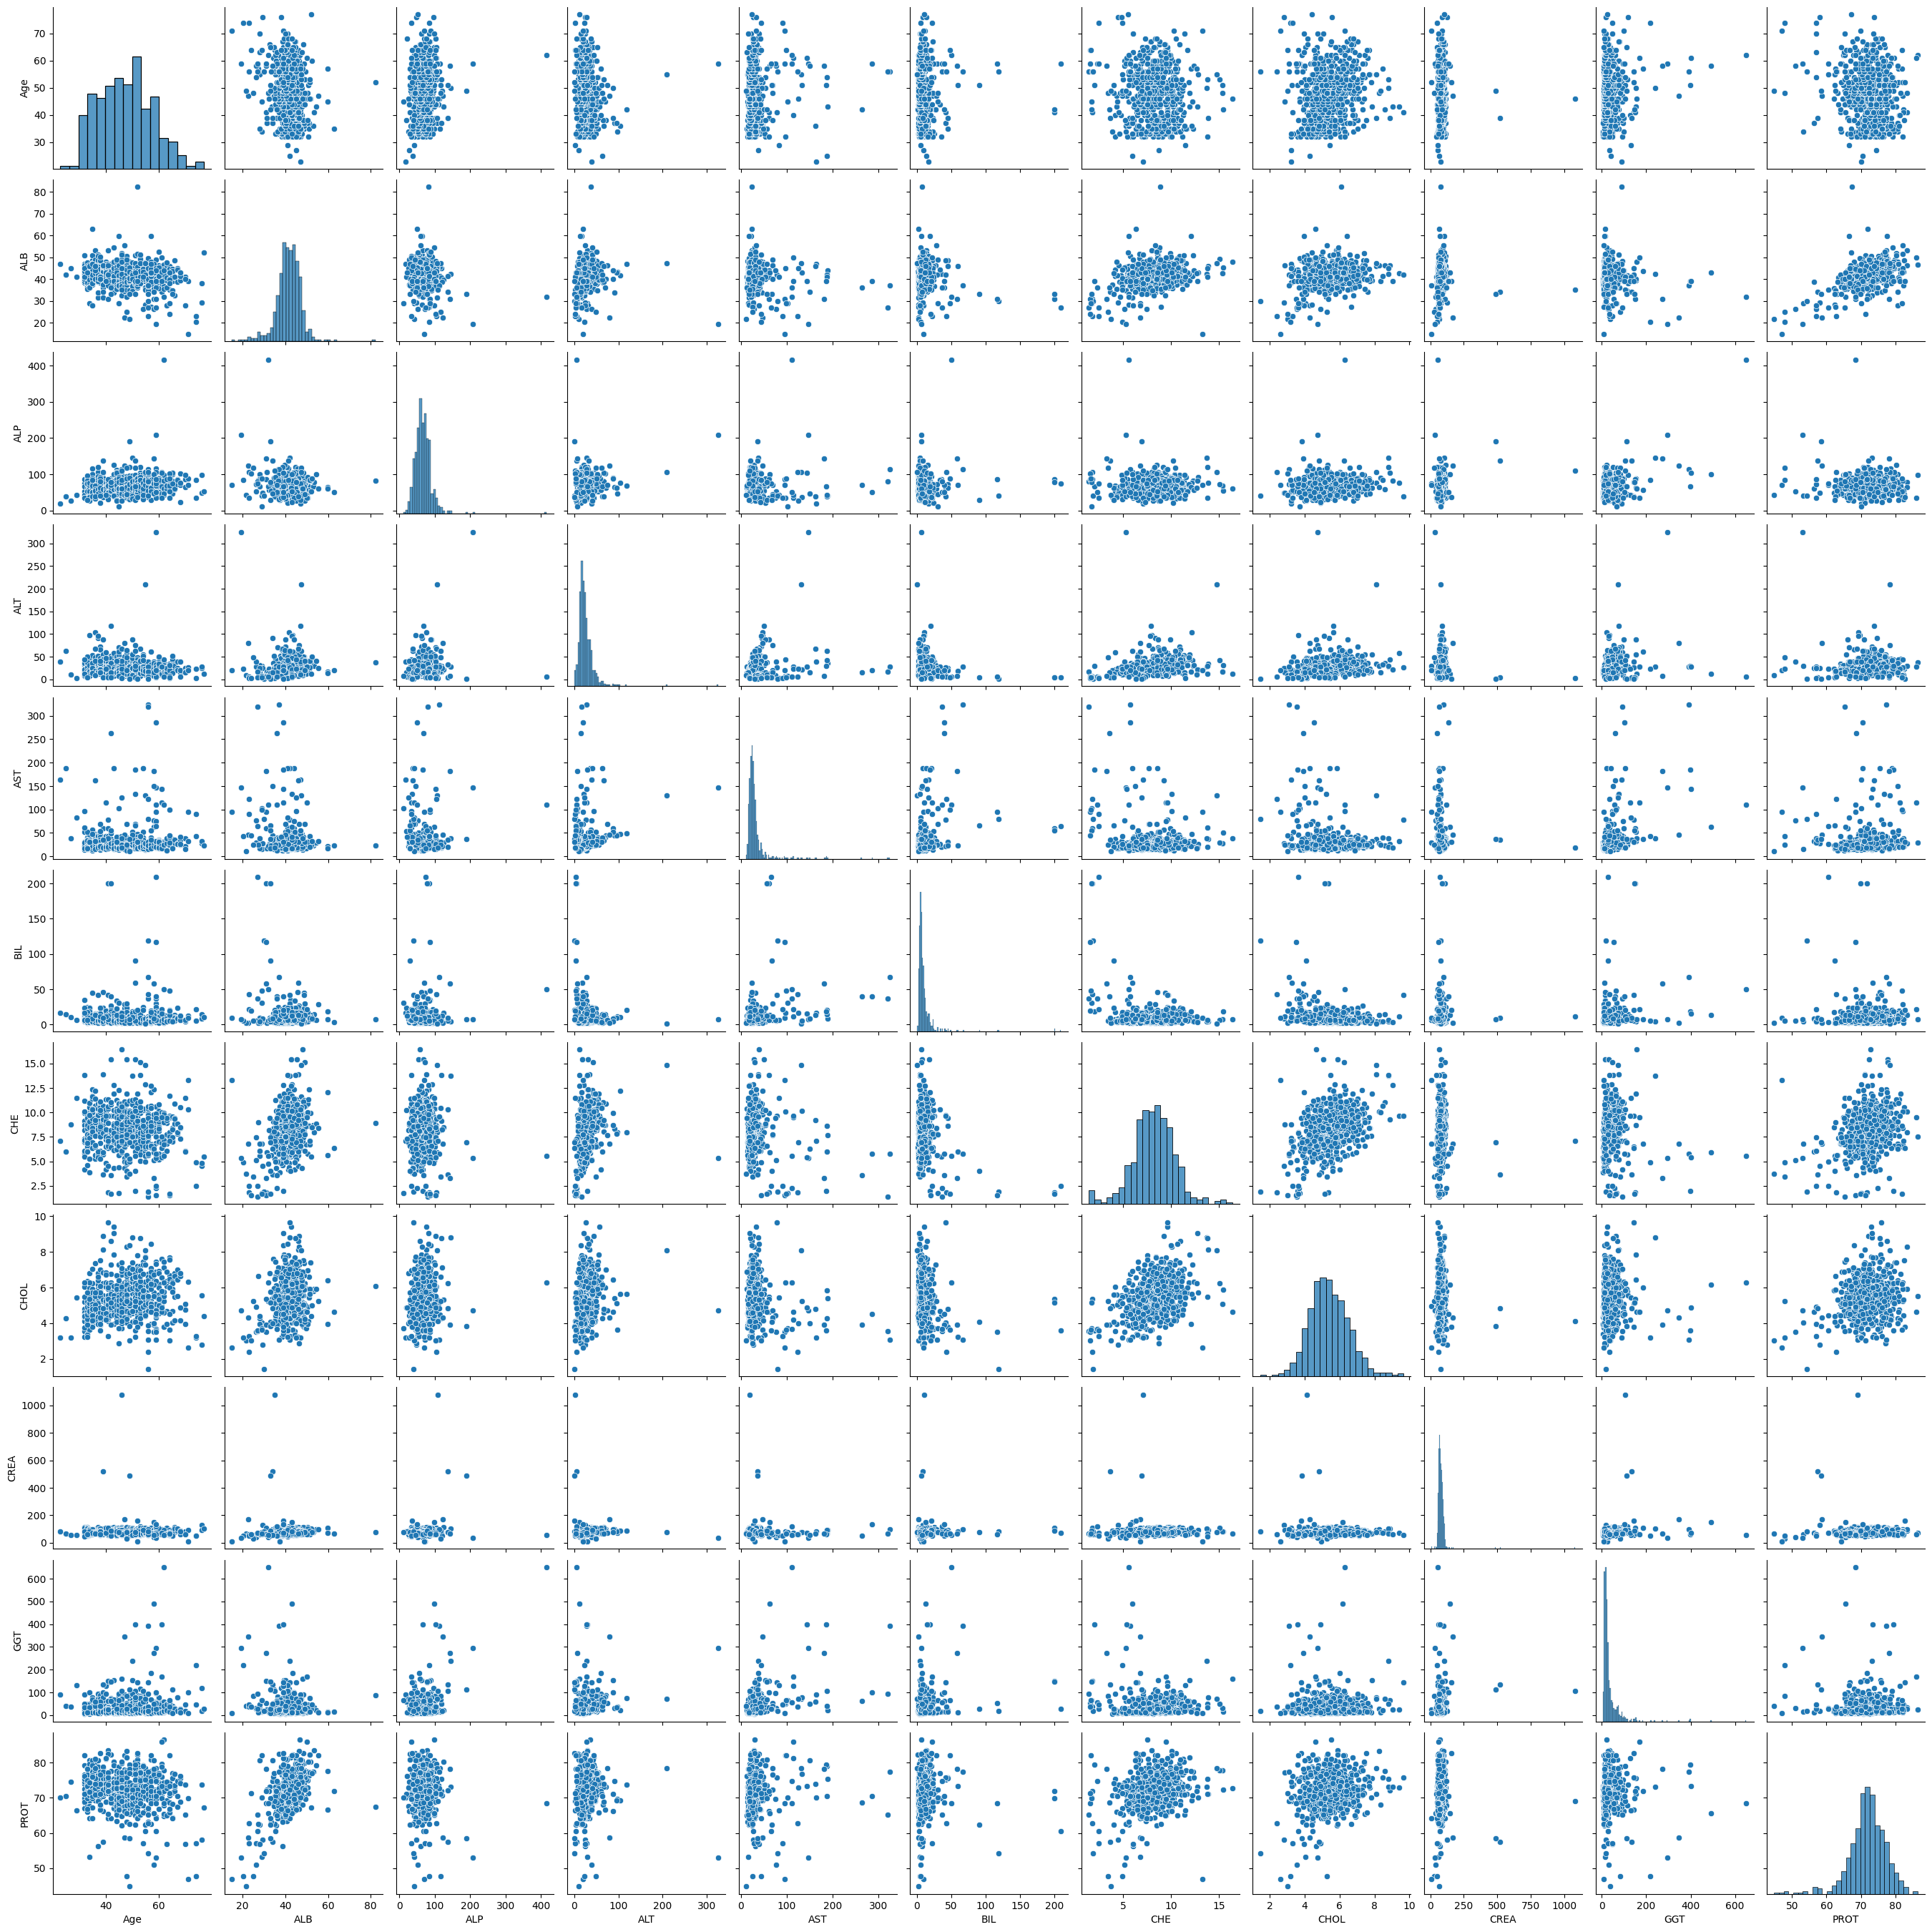

In [ ]:
# Use pairplot to identify if there are features that can be used in different clustering methods.
sns.pairplot(df)
plt.show()

# KMEANS CLUSTERING

In [ ]:
# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# Split training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, true_labels_binary, test_size=0.2, random_state=42)

In [ ]:
# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2)
y_km_pred = kmeans.fit_predict(X_train, y_train)
y_km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [ ]:
y_km_pred = kmeans.fit_predict(X_test)
y_km_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1], dtype=int32)

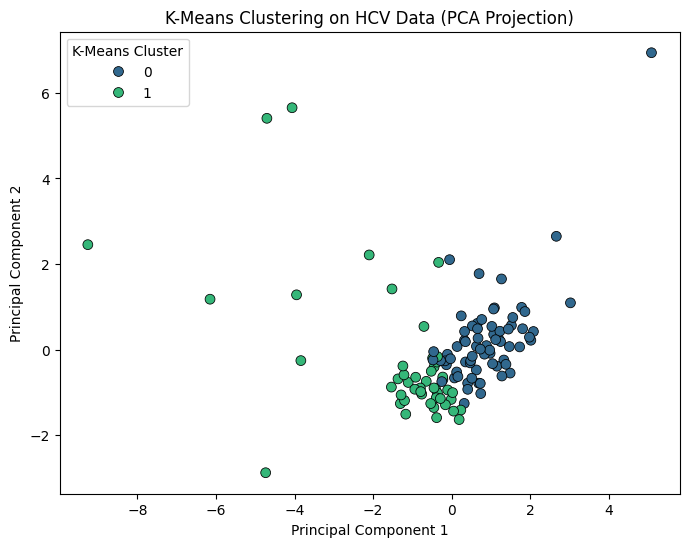

In [ ]:
# Apply PCA on the test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Convert results into a DataFrame for visualization
df_kmeans = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_kmeans['Cluster'] = y_km_pred  # Predicted K-Means cluster labels
df_kmeans['TrueLabel'] = y_test  # Actual labels

# Plot PCA-transformed data with cluster colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50, edgecolor='k')
plt.title("K-Means Clustering on HCV Data (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="K-Means Cluster")
plt.show()

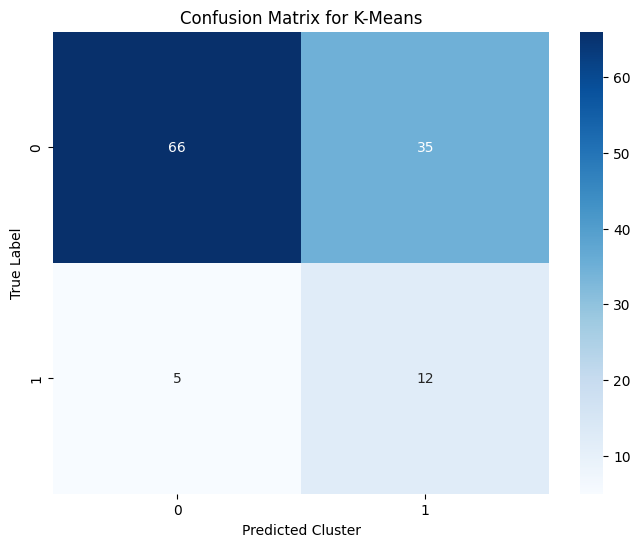

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_km_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_km_pred), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Means')
plt.show()

# DBSCAN CLUSTERING

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.2, min_samples=5)
y_db_train = dbscan.fit_predict(X_train)
y_db_test = dbscan.fit_predict(X_test)

In [ ]:
# Get unique clusters
unique_clusters_train = np.unique(y_db_train)
unique_clusters_test = np.unique(y_db_test)
unique_true_labels = np.unique(y_test)

In [ ]:
# Combine the scaled data and labels for visualization
df_scaled = np.vstack([X_train, X_test])
label = np.concatenate([y_db_train, y_db_test])
true_labels_binary = np.concatenate([np.zeros_like(y_db_train), y_test])

In [ ]:
# Create a new column "Cluster" to make it organized.
df["Cluster"] = label

In [ ]:
# Create a new column "Cluster" to make it organized.
df["Cluster"] = label

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Convert results into a DataFrame for plotting
df_plot = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_plot['Cluster'] = label
df_plot['TrueLabel'] = true_labels_binary

df_plot = df_plot.dropna()

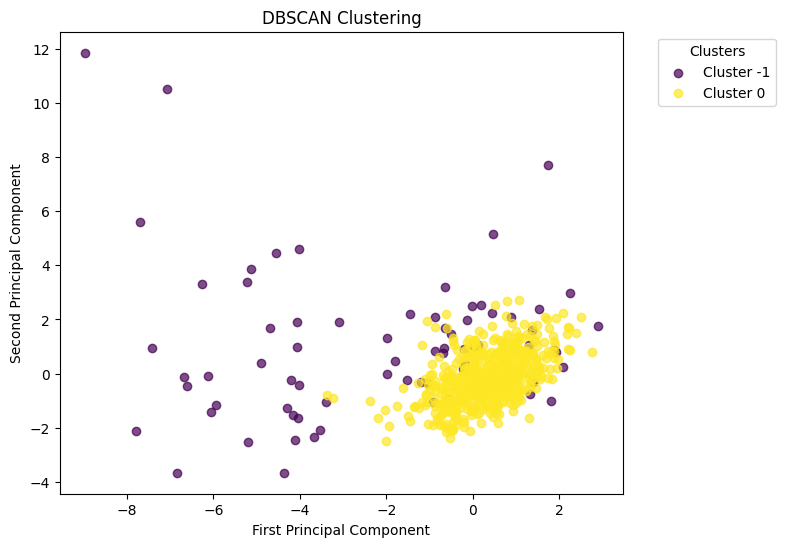

In [ ]:
# Create DataFrame for plotting
df_plot = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_plot['Cluster'] = label
df_plot['TrueLabel'] = true_labels

# Visualization with distinct colors and labels
plt.figure(figsize=(16, 6))

# Subplot for Clusters
plt.subplot(1, 2, 1)
# Create a color map for clusters
unique_clusters = np.unique(label)
cluster_colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

# Plot each cluster with a different color
for cluster, color in zip(unique_clusters, cluster_colors):
    mask = df_plot['Cluster'] == cluster
    plt.scatter(df_plot.loc[mask, 'PC1'],
                df_plot.loc[mask, 'PC2'],
                c=[color],
                label=f'Cluster {cluster}',
                alpha=0.7)

plt.title('DBSCAN Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

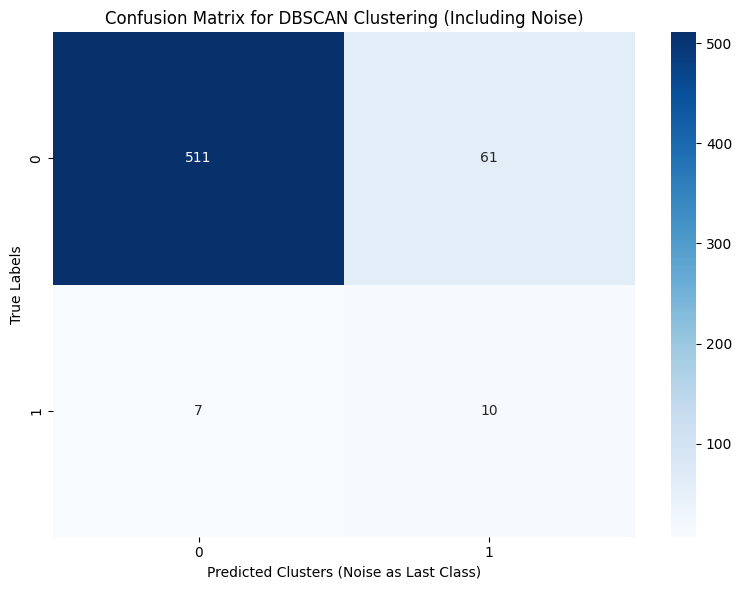

In [ ]:

label_with_noise = label.copy()
label_with_noise[label == -1] = max(unique_clusters_test) + 1  # Use unique_clusters_test
# Convert true_labels_with_noise to numerical labels
true_labels_with_noise = true_labels_binary.astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels_with_noise, label_with_noise)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(np.unique(label_with_noise)),
            yticklabels=sorted(np.unique(true_labels_with_noise)))
plt.title('Confusion Matrix for DBSCAN Clustering (Including Noise)')
plt.xlabel('Predicted Clusters (Noise as Last Class)')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# HIERARCHICAL CLUSTERING

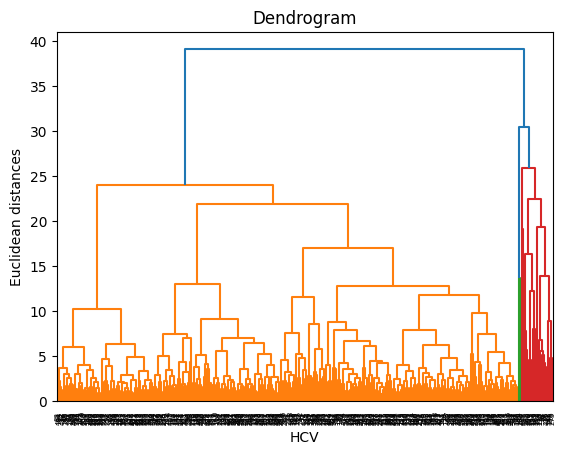

In [ ]:
#Creates a dendrogram to visualize the hierarchical relationships between data points in the training set.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('HCV')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_train_hc = hc.fit_predict(X_train)
y_test_hc = hc.fit_predict(X_test)

In [ ]:
df_scaled = np.vstack([X_train, X_test])
label = np.concatenate([y_train_hc, y_test_hc])
true_labels = np.concatenate([np.zeros_like(y_train_hc), y_test])

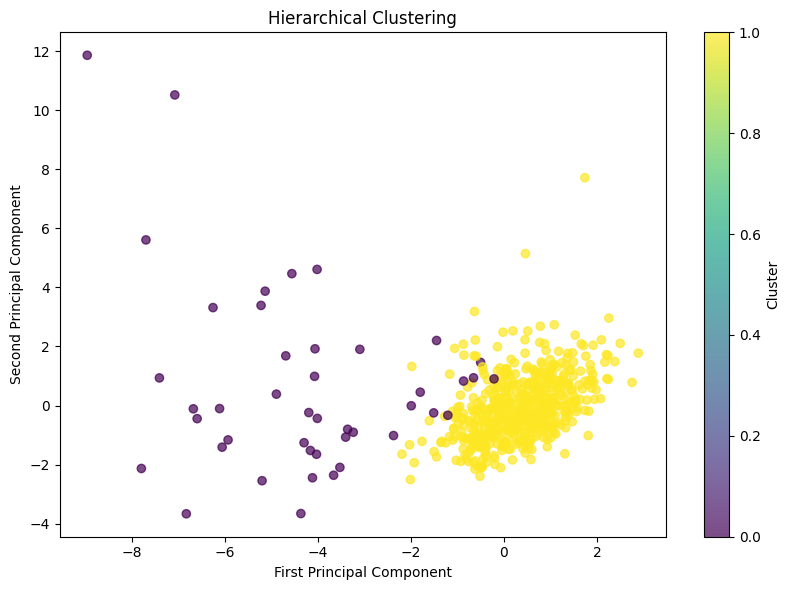

In [ ]:
# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create DataFrame for plotting
df_plot = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_plot['Cluster'] = label
df_plot['TrueLabel'] = true_labels


# Visualization of Clustering
plt.figure(figsize=(16, 6))

# Subplot for Clusters
plt.subplot(1, 2, 1)
scatter_clusters = plt.scatter(df_plot['PC1'], df_plot['PC2'],
                               c=df_plot['Cluster'],
                               cmap='viridis',
                               alpha=0.7)
plt.title('Hierarchical Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter_clusters, label='Cluster')


plt.tight_layout()
plt.show()

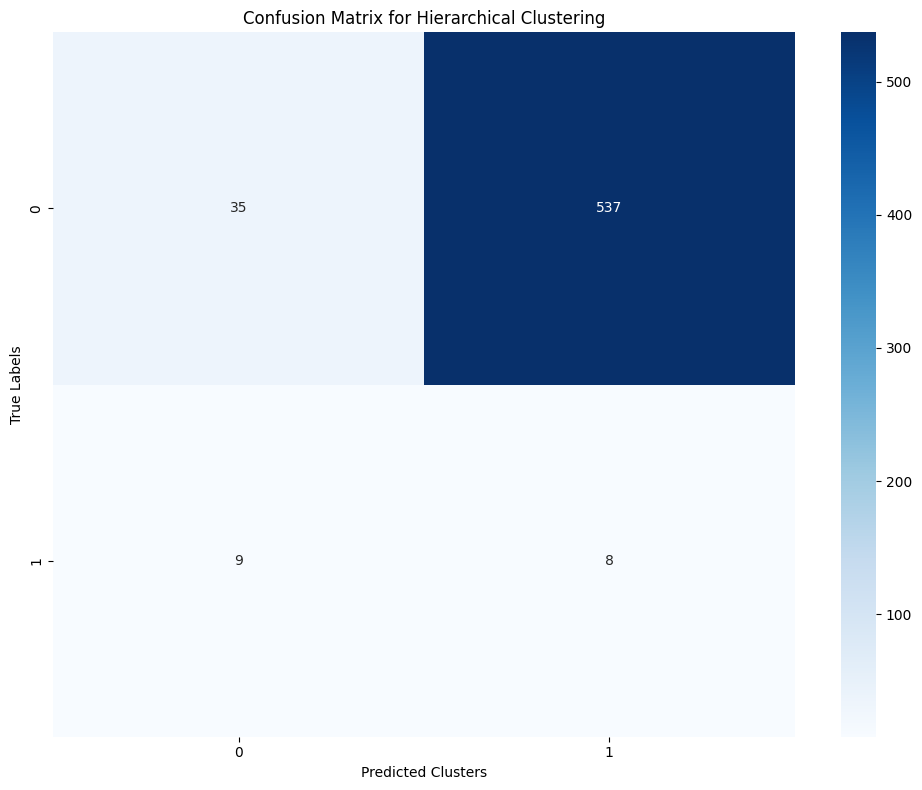

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, label)

# Visualization of Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(label),
            yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix for Hierarchical Clustering')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()